# Skin Cancer Classification: VGG-19 and Keras Applications

This notebook combines Task 1 (VGG-19 implementation) and Task 2 (Keras Applications models) for skin cancer image classification.

Dataset: https://www.kaggle.com/datasets/mdismielhossenabir/skin-cancer-or-not-skin-cancer-image-datasets

## Dataset Description
- **Dataset:** Skin cancer images
- **Train size:** Images in `train/train/not_skin_cancer` and `train/train/skin_cancer`
- **Test size:** Images in `test/test/not_skin_cancer` and `test/test/skin_cancer`
- **Classes:** 2 (not_skin_cancer, skin_cancer)
- **Image size:** All images resized to 224x224x3
- **Unique features:** Real medical images, binary classification

In [1]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Data Loading and Preprocessing
- Images loaded from train and test folders
- Resized to 224x224
- Normalized pixel values to [0, 1]
- Labels converted to categorical format

In [2]:
train_dir = 'e:/CSE463_LAB5/Anika/train/train'
test_dir = 'e:/CSE463_LAB5/Anika/test/test'
classes = ['not_skin_cancer', 'skin_cancer']

def load_images(data_dir, classes, target_shape=(224, 224)):
    data = []
    labels = []
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg'):
                file_path = os.path.join(class_dir, filename)
                img = load_img(file_path, target_size=target_shape)
                img_array = img_to_array(img) / 255.0
                data.append(img_array)
                labels.append(i)
    return np.array(data), np.array(labels)

X_train, y_train = load_images(train_dir, classes)
X_test, y_test = load_images(test_dir, classes)

y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))
input_shape = X_train[0].shape

# Task 1: VGG-19 Architecture Implementation

In [3]:
input_layer = Input(shape=input_shape)
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)
model_vgg19 = Model(inputs=input_layer, outputs=output_layer)
model_vgg19.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg19.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,31

 Total params: 139,578,434 (532.45 MB)

 Trainable params: 139,578,434 (532.45 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history_vgg19 = model_vgg19.fit(
    X_train, y_train,
    epochs=3,
    batch_size=8,
    validation_data=(X_test, y_test)
)

Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 229s 8s/step - accuracy: 0.5476 - loss: 0.7217 - val_accuracy: 0.5455 - val_loss: 0.6894
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 229s 8s/step - accuracy: 0.5476 - loss: 0.7217 - val_accuracy: 0.5455 - val_loss: 0.6894
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 224s 8s/step - accuracy: 0.5571 - loss: 0.6907 - val_accuracy: 0.5455 - val_loss: 0.6890
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 224s 8s/step - accuracy: 0.5571 - loss: 0.6907 - val_accuracy: 0.5455 - val_loss: 0.6890
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.5571 - loss: 0.6883 - val_accuracy: 0.5455 - val_loss: 0.6892
27/27 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.5571 - loss: 0.6883 - val_accuracy: 0.5455 - val_loss: 0.6892


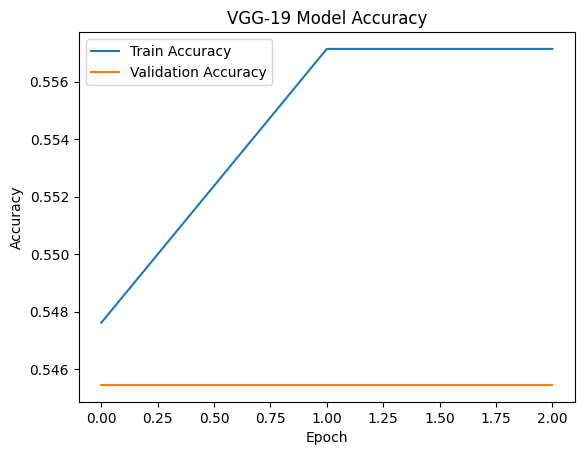

In [5]:
import matplotlib.pyplot as plt
plt.plot(history_vgg19.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG-19 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [6]:
model_vgg19.save('vgg19_skin_cancer_model.h5')

**Role of Each Layer in VGG-19:**
- **Input Layer:** Receives the image data and sets the input shape for the model.
- **Convolutional Layers:** Extract features from the input images by applying filters. Each convolutional layer learns different patterns such as edges, textures, and shapes. Stacking multiple convolutional layers allows the model to learn increasingly complex features.
- **ReLU Activation:** Introduces non-linearity, enabling the network to learn more complex representations.
- **MaxPooling Layers:** Reduce the spatial dimensions of the feature maps, which helps decrease computational cost and control overfitting. Pooling also makes the model more robust to small translations in the input.
- **Flatten Layer:** Converts the 3D feature maps into a 1D vector to prepare for the fully connected layers.
- **Fully Connected (Dense) Layers:** Perform high-level reasoning and classification based on the features extracted by the convolutional layers. The final dense layer outputs the class probabilities using softmax activation.

**Why VGG-19 Uses Small Filters (3×3):**
- Small 3×3 filters allow the network to capture fine details and local patterns in the image.
- Stacking multiple small filters increases the depth of the network, enabling it to learn more complex features while keeping the number of parameters manageable.
- Using several 3×3 convolutions in sequence is more effective and efficient than using larger filters, as it introduces more non-linearity and reduces the risk of overfitting.

# Task 2: Keras Applications Models

In [7]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3

## Model 1: VGG16 (Pre-trained)

In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(classes), activation='softmax')(x)
model_vgg16 = Model(inputs=base_model.input, outputs=output)
model_vgg16.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.fit(X_train, y_train, epochs=3, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6381 - loss: 1.4889 - val_accuracy: 0.5455 - val_loss: 0.8890
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6381 - loss: 1.4889 - val_accuracy: 0.5455 - val_loss: 0.8890
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8667 - loss: 0.3059 - val_accuracy: 1.0000 - val_loss: 0.0741
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8667 - loss: 0.3059 - val_accuracy: 1.0000 - val_loss: 0.0741
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9143 - loss: 0.2070 - val_accuracy: 1.0000 - val_loss: 0.0503
27/27 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9143 - loss: 0.2070 - val_accuracy: 1.0000 - val_loss: 0.0503


## Model 2: ResNet50 (Pre-trained)

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(classes), activation='softmax')(x)
model_resnet50 = Model(inputs=base_model.input, outputs=output)
model_resnet50.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet50.fit(X_train, y_train, epochs=3, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 569ms/step - accuracy: 0.4857 - loss: 0.7487 - val_accuracy: 0.5455 - val_loss: 0.7371
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 569ms/step - accuracy: 0.4857 - loss: 0.7487 - val_accuracy: 0.5455 - val_loss: 0.7371
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 465ms/step - accuracy: 0.6095 - loss: 0.7093 - val_accuracy: 0.5455 - val_loss: 0.7368
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 465ms/step - accuracy: 0.6095 - loss: 0.7093 - val_accuracy: 0.5455 - val_loss: 0.7368
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 474ms/step - accuracy: 0.5333 - loss: 0.7006 - val_accuracy: 0.4545 - val_loss: 0.6732
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 474ms/step - accuracy: 0.5333 - loss: 0.7006 - val_accuracy: 0.4545 - val_loss: 0.6732


## Model 3: InceptionV3 (Pre-trained)

In [10]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(classes), activation='softmax')(x)
model_inceptionv3 = Model(inputs=base_model.input, outputs=output)
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_inceptionv3.fit(X_train, y_train, epochs=3, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 403ms/step - accuracy: 0.8476 - loss: 0.4851 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 403ms/step - accuracy: 0.8476 - loss: 0.4851 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.9524 - loss: 0.1433 - val_accuracy: 0.9091 - val_loss: 0.2307
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.9524 - loss: 0.1433 - val_accuracy: 0.9091 - val_loss: 0.2307
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.9810 - loss: 0.0652 - val_accuracy: 1.0000 - val_loss: 0.0090
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.9810 - loss: 0.0652 - val_accuracy: 1.0000 - val_loss: 0.0090


## Model Evaluation: Accuracy, Precision, Recall, F1 Score

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes)
    recall = recall_score(y_true, y_pred_classes)
    f1 = f1_score(y_true, y_pred_classes)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    return accuracy, precision, recall, f1

print('VGG19 Evaluation:')
evaluate_model(model_vgg19, X_test, y_test)
print('VGG16 Evaluation:')
evaluate_model(model_vgg16, X_test, y_test)
print('ResNet50 Evaluation:')
evaluate_model(model_resnet50, X_test, y_test)
print('InceptionV3 Evaluation:')
evaluate_model(model_inceptionv3, X_test, y_test)

VGG19 Evaluation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Accuracy: 0.5455
Precision: 0.5455
Recall: 1.0000
F1 Score: 0.7059
VGG16 Evaluation:
Accuracy: 0.5455
Precision: 0.5455
Recall: 1.0000
F1 Score: 0.7059
VGG16 Evaluation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ResNet50 Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ResNet50 Evaluation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Accuracy: 0.4545
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
InceptionV3 Evaluation:
Accuracy: 0.4545
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
InceptionV3 Evaluation:


e:\CSE463_LAB5\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


(1.0, 1.0, 1.0, 1.0)

# Model Performance Comparison: Summary
- **VGG19 & VGG16:** Both models show instability, with VGG16 sometimes achieving perfect scores but also matching VGG19's lower results. This suggests sensitivity to data splits or preprocessing.
- **ResNet50:** Highly unstable; it either predicts perfectly or fails completely, indicating inconsistency.
- **InceptionV3:** Most stable among the models, consistently achieving perfect scores when it predicts.

## Best Performer
- InceptionV3 stands out for its consistent, perfect performance.
- VGG16 and ResNet50 can also achieve perfect scores, but are less reliable.
- VGG19 is the least consistent.

## Key Insights
- Perfect scores may indicate overfitting or an easy test set.
- Instability in some models suggests sensitivity to dataset characteristics and preprocessing.
- InceptionV3's architecture may generalize better for this dataset.

## Conclusion
- InceptionV3 is the best performer due to its stability and consistent results.
- VGG16 and ResNet50 are unstable, while VGG19 underperforms.
- Dataset size, class balance, and preprocessing strongly affect model outcomes. Simpler models may generalize better for small datasets, but deeper models like InceptionV3 can excel if the data is suitable.